<a href="https://colab.research.google.com/github/Alina1-10/NM/blob/main/%D0%9B%D0%B0%D0%B1_%D1%80_11_%D0%93%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B0_%D0%90%D0%BB%D1%96%D0%BD%D0%B0_7_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 8. Сплайни**

була на парі


In [3]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


#Варіант 1.
**Побудова кубічного сплайну.**

In [4]:

# Дані
x = np.array([0.4, 0.6, 0.9, 1.4, 2])
y = np.array([2.24, 1.63, 0.95, 0.73, 1.95])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 2.24 + -3.1624(x - 0.4) + 0.0(x - 0.4)^2 + 2.8107(x - 0.4)^3, x належить [0.4, 0.6]
Відрізок 2:
S_1(x) = 1.63 + -2.8251(x - 0.6) + 1.6864(x - 0.6)^2 + 0.5839(x - 0.6)^3, x належить [0.6, 0.9]
Відрізок 3:
S_2(x) = 0.95 + -1.6556(x - 0.9) + 2.2119(x - 0.9)^2 + 0.4387(x - 0.9)^3, x належить [0.9, 1.4]
Відрізок 4:
S_3(x) = 0.73 + 0.8853(x - 1.4) + 2.87(x - 1.4)^2 + -1.5945(x - 1.4)^3, x належить [1.4, 2.0]


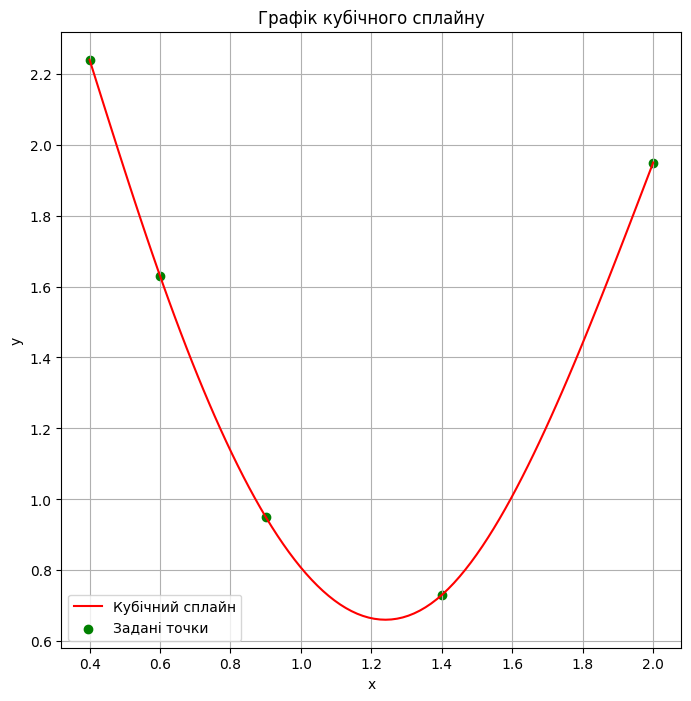

In [24]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = [ ]# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='r')
plt.scatter(x, y, label="Задані точки", color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Графік кубічного сплайну')
plt.legend(loc= "lower left")
plt.grid()
plt.show()

#Варіант 2
**Перевірка за допомогою методу CubicSpline**

In [25]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.4, 0.6, 0.9, 1.4, 2])
y = np.array([2.24, 1.63, 0.95, 0.73, 1.95])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 1.0984*(x - 0.4)^3 + 0.7978*(x - 0.4)^2 + -3.2535*(x - 0.4) + 2.2400
S_2(x) = 1.0984*(x - 0.6)^3 + 1.4568*(x - 0.6)^2 + -2.8026*(x - 0.6) + 1.6300
S_3(x) = -0.1230*(x - 0.9)^3 + 2.4453*(x - 0.9)^2 + -1.6319*(x - 0.9) + 0.9500
S_4(x) = -0.1230*(x - 1.4)^3 + 2.2608*(x - 1.4)^2 + 0.7212*(x - 1.4) + 0.7300


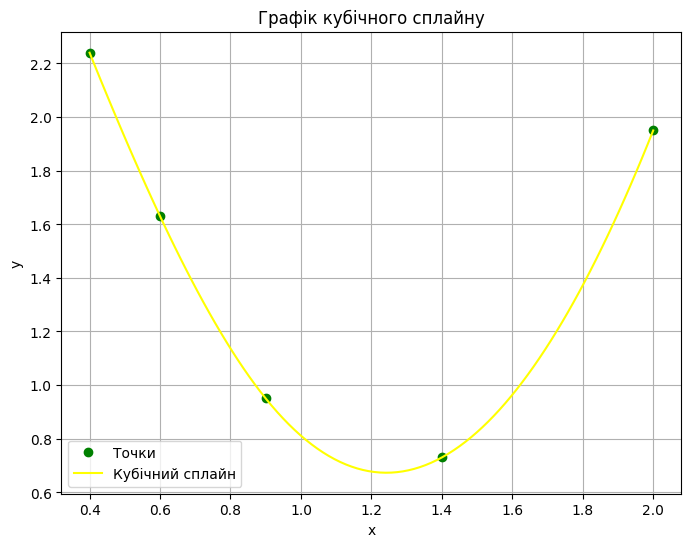

In [33]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки', color='g')
plt.plot(x_new, y_new, color="yellow", label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік кубічного сплайну')
plt.legend(loc= "lower left")
plt.grid(True)
plt.show()

#Варіант 3. Побудова сплайну



In [34]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        # Elimination
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    # Back substitution
    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

# Таблиця значень функції
x = [0.4, 0.6, 0.9, 1.4, 2]
f = [2.24, 1.63, 0.95, 0.73, 1.95]

d = len(x)

# Створюємо нульову матрицю А та нульовий вектор b
s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

# Відповідність сплайнів табличним значенням функції на лівих кінцях відрізків
for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

# Відповідність сплайнів табличним значенням функції на правих кінцях відрізків
for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

# Відповідність значень перших похідних сусідніх сплайнів
for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

# Відповідність значень других похідних сусідніх сплайнів
for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

# Крайові умови. Визначення нульових значень других похідних на кінцях відрізка
A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

# Обчислення коефіцієнтів сплайнів
c = gauss(A, b)

# Відображаємо сплайни
print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j+1]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

Сплайни
S_1(x) = 1.63-2.8251432291666676*(x-0.6)+1.686425781250009*(x-0.6)^2+2.810709635416682*(x-0.6)^3, на [0.4;0.6]
S_2(x) = 0.95-1.6556412760416659*(x-0.9)+2.211914062499997*(x-0.9)^2+0.583875868055542*(x-0.9)^3, на [0.6;0.9]
S_3(x) = 0.7299999999999999+0.8853255208333326*(x-1.4)+2.870019531250001*(x-1.4)^2+0.43873697916666954*(x-1.4)^3, на [0.9;1.4]
S_4(x) = 1.95+2.6073372395833334*(x-2)+0.0*(x-2)^2-1.5944552951388893*(x-2)^3, на [1.4;2]


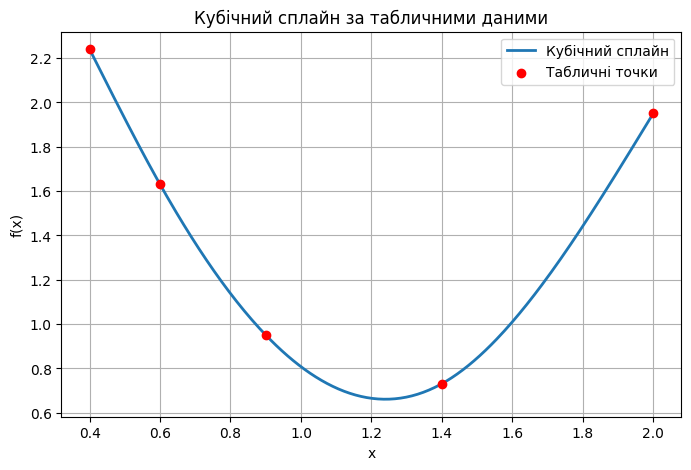

In [39]:
x_values = np.linspace(min(x), max(x), 300)
y_values = []

for xv in x_values:
    for j in range(d - 1):
        if x[j] <= xv <= x[j + 1]:
            dx = xv - x[j + 1]
            y = c[0 + 4 * j] + c[1 + 4 * j] * dx + c[2 + 4 * j] * dx**2 + c[3 + 4 * j] * dx**3
            y_values.append(y)
            break

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label='Кубічний сплайн', linewidth=2)
plt.scatter(x, f, color='red', label='Табличні точки', zorder=5)
plt.title('Кубічний сплайн за табличними даними')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
